## Using a Language Model’s Perplexity for Evaluating a Trajectory's Outlierness

In [9]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from typing import List
import random
import copy
import matplotlib.pyplot as plt

# Load trajectory data
# Define the folder names and file names
folder_names = []
# for f in ["AiSq5D","AiSq10D","AiSq5P","AiSq10P","AiSq5DP","AiSq10DP","StSt5M","StSt10M","StSt5R","StSt10R","UnCh5M","UnCh10M"]:
for f in ["AiSq5D"]:
    folder_names.append("dataset/" + f)

### Load trajectory data

In [10]:
# Create empty lists to store the trajectory data
inner_trajectories = []
outlier_trajectories = []

# Loop through folders and files to load the data
for folder_name in folder_names:
    path_inner = os.path.join(folder_name, "inners.txt")
    path_outlier = os.path.join(folder_name, "outliers.txt")

    if os.path.exists(path_inner):
        with open(path_inner, "r") as file:
            # Read lines from the file and convert to numpy arrays
            lines = file.readlines()
            for line in lines:
                data = [list(map(float, line.strip("[]").split(","))) for line in line.strip().split("], [")]
                inner_trajectories.append(np.array(data))
    if os.path.exists(path_outlier):
        with open(path_outlier, "r") as file:
            # Read lines from the file and convert to numpy arrays
            lines = file.readlines()
            for line in lines:
                data = [list(map(float, line.strip("[]").split(","))) for line in line.strip().split("], [")]
                outlier_trajectories.append(np.array(data))

In [11]:
print(len(inner_trajectories))
print(len(outlier_trajectories))

1060
55


In [12]:
inner_trajectories

[array([[ 96508.61145594, -11969.03170726],
        [ 96440.16757657, -11864.84674474],
        [ 96489.31346411, -11650.00676999],
        [ 96538.44294821, -11434.16574317],
        [ 96546.9788077 , -11396.01901332],
        [ 96552.5808583 , -11363.91649067],
        [ 96572.36015825, -11264.56678406],
        [ 96571.60683446, -11264.5767836 ],
        [ 96570.85351067, -11264.58678305],
        [ 96570.88005695, -11266.58819208],
        [ 96526.10226323, -11242.16040791],
        [ 96320.0218216 , -11212.86352741],
        [ 96104.47942587, -11322.80808751],
        [ 95890.79730613, -11345.64515568],
        [ 95618.50685306, -11266.15596724],
        [ 95390.67998732, -11071.97379365],
        [ 95160.69148007, -10826.76826076],
        [ 94905.52167822, -10555.86153338],
        [ 94639.72139769, -10277.07752237],
        [ 94377.7201365 ,  -9999.23575928],
        [ 94120.36111423,  -9729.33185219],
        [ 93872.90205804,  -9466.29753153],
        [ 93605.64806123,  -9185

### visualize the trajectory

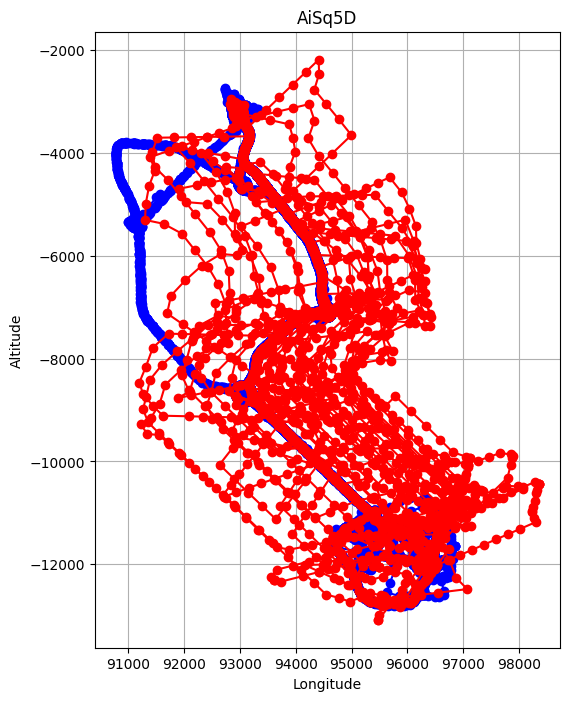

In [13]:
num_trajectories = len(inner_trajectories)
num_trajectories_o = len(outlier_trajectories)

# Create a new figure for the combined plot
plt.figure(figsize=(6, 8))

# Iterate through the sets of trajectories and create scatter plots for each
for i in range(num_trajectories):
    df = pd.DataFrame(inner_trajectories[i], columns=["Longitude", "Altitude"])
    # Scatter plot for the current set of trajectories
    plt.plot(df['Longitude'], df['Altitude'], c='b', marker='o')

for j in range(num_trajectories_o):
    df_o = pd.DataFrame(outlier_trajectories[j], columns=["Longitude", "Altitude"])
    
    # Scatter plot for the current set of trajectories
    plt.plot(df_o['Longitude'], df_o['Altitude'], c='r', marker='o')

# Customize the plot
plt.title('AiSq5D')
plt.xlabel('Longitude')
plt.ylabel('Altitude')
plt.grid(True)

# Show the combined scatter plot for all trajectories
plt.show()

### Map trajectory data into words

#### Create the grid.

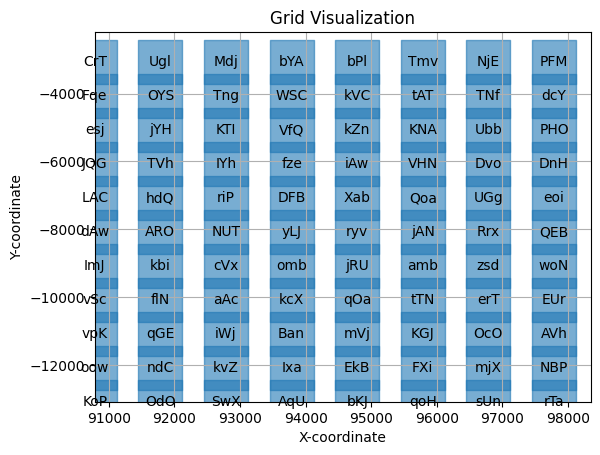

In [14]:
import string

trajectory_all = inner_trajectories + outlier_trajectories
min_x = min(point[0] for trajectory in trajectory_all for point in trajectory)
max_x = max(point[0] for trajectory in trajectory_all for point in trajectory)
min_y = min(point[1] for trajectory in trajectory_all for point in trajectory)
max_y = max(point[1] for trajectory in trajectory_all for point in trajectory)

# Define the grid cell size (adjust this according to your needs)
cell_size = 1000  # You can change this to make the grid cells smaller or larger

# Create an empty grid
grid = {}

# Generate random 3-letter labels for each grid cell
for x in np.arange(min_x, max_x, cell_size):
    for y in np.arange(min_y, max_y, cell_size):
        label = ''.join(random.choice(string.ascii_letters) for _ in range(3))
        grid[(x, y)] = label

grid_x = [coord[0] for coord in grid.keys()]
grid_y = [coord[1] for coord in grid.keys()]
labels = list(grid.values())

# Create a scatter plot to visualize the grid
plt.scatter(grid_x, grid_y, marker='s', s=1000, label='Grid Cell', alpha=0.6)

# Add labels to the grid cells
for i, txt in enumerate(labels):
    plt.annotate(txt, (grid_x[i], grid_y[i]), fontsize=10, ha='center', va='center')

# Set axis limits based on trajectory data
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Show the plot
plt.title('Grid Visualization')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()
plt.show()

In [15]:
grid

{(90786.66032646291, -13077.586383248203): 'KoP',
 (90786.66032646291, -12077.586383248203): 'oow',
 (90786.66032646291, -11077.586383248203): 'vpK',
 (90786.66032646291, -10077.586383248203): 'vSc',
 (90786.66032646291, -9077.586383248203): 'ImJ',
 (90786.66032646291, -8077.586383248203): 'dAw',
 (90786.66032646291, -7077.586383248203): 'LAC',
 (90786.66032646291, -6077.586383248203): 'JQG',
 (90786.66032646291, -5077.586383248203): 'esj',
 (90786.66032646291, -4077.5863832482028): 'Fqe',
 (90786.66032646291, -3077.5863832482028): 'CrT',
 (91786.66032646291, -13077.586383248203): 'OdO',
 (91786.66032646291, -12077.586383248203): 'ndC',
 (91786.66032646291, -11077.586383248203): 'qGE',
 (91786.66032646291, -10077.586383248203): 'flN',
 (91786.66032646291, -9077.586383248203): 'kbi',
 (91786.66032646291, -8077.586383248203): 'ARO',
 (91786.66032646291, -7077.586383248203): 'hdQ',
 (91786.66032646291, -6077.586383248203): 'TVh',
 (91786.66032646291, -5077.586383248203): 'jYH',
 (91786.66

#### Add the trajectory lines.

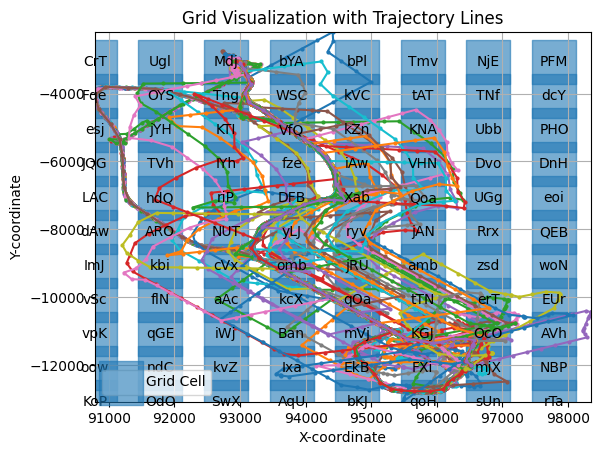

In [16]:
plt.scatter(grid_x, grid_y, marker='s', s=1000, label='Grid Cell', alpha=0.6)

# Add labels to the grid cells
for i, txt in enumerate(labels):
    plt.annotate(txt, (grid_x[i], grid_y[i]), fontsize=10, ha='center', va='center')

# Plot trajectory lines
for trajectory in trajectory_all:
    x_values = [point[0] for point in trajectory]
    y_values = [point[1] for point in trajectory]
    plt.plot(x_values, y_values, marker='o', markersize=2)

# Set axis limits based on trajectory data
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Show the plot
plt.title('Grid Visualization with Trajectory Lines')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()
plt.legend()
plt.show()

In [17]:
# Create a dictionary to map inner trajectory data points to words
# cell_size = 1000
trajectory_to_words = {}

# Iterate through the trajectory data
for trajectory in inner_trajectories:
    words_for_trajectory = []
    for point in trajectory:
        x, y = point[0], point[1]
        
        closest_grid_cell = min(grid.keys(), key=lambda cell: ((cell[0] - x) ** 2 + (cell[1] - y) ** 2) ** 0.5)
        
        label = grid.get(closest_grid_cell, '')  # Get the corresponding label from the grid
        words_for_trajectory.append(label)
    trajectory_to_words[tuple(map(tuple, trajectory))] = words_for_trajectory

# Print the mapping of trajectory points to words
inner_sentences = []
for trajectory, words in trajectory_to_words.items():
    print("Trajectory:", trajectory)
    print("Mapped Words:", words)
    inner_sentences.append(words)


Trajectory: ((96508.61145594271, -11969.031707258715), (96440.16757657452, -11864.846744739125), (96489.31346411127, -11650.006769987127), (96538.44294821454, -11434.165743167023), (96546.97880769793, -11396.019013317822), (96552.58085830342, -11363.916490667965), (96572.36015824963, -11264.566784063783), (96571.6068344626, -11264.576783596765), (96570.85351067438, -11264.586783051622), (96570.88005694974, -11266.588192083556), (96526.10226323469, -11242.160407905563), (96320.02182159855, -11212.863527412776), (96104.47942586608, -11322.808087509467), (95890.79730612865, -11345.645155679864), (95618.50685305583, -11266.155967241155), (95390.67998732191, -11071.973793648005), (95160.69148006875, -10826.768260755665), (94905.52167821796, -10555.861533384155), (94639.72139768928, -10277.077522369742), (94377.72013649555, -9999.235759281948), (94120.36111422673, -9729.331852191453), (93872.90205804276, -9466.297531534954), (93605.64806122595, -9185.494219705643), (93342.17980583763, -8904.

In [18]:
# Create a dictionary to map outlier trajectory data points to words
# cell_size = 1000
trajectory_to_words_o = {}

# Iterate through the trajectory data
for trajectory_o in outlier_trajectories:
    words_for_trajectory_o = []
    for point in trajectory_o:
        x, y = point[0], point[1]
        
        closest_grid_cell = min(grid.keys(), key=lambda cell: ((cell[0] - x) ** 2 + (cell[1] - y) ** 2) ** 0.5)
        
        label = grid.get(closest_grid_cell, '')  # Get the corresponding label from the grid
        words_for_trajectory_o.append(label)
    trajectory_to_words_o[tuple(map(tuple, trajectory_o))] = words_for_trajectory_o

# Print the mapping of trajectory points to words
outlier_sentences = []
for trajectory_o, words_o in trajectory_to_words_o.items():
    print("Trajectory:", trajectory_o)
    print("Mapped Words:", words_o)
    outlier_sentences.append(words_o)

Trajectory: ((96478.72517385636, -11931.394581321189), (96441.18602701525, -11884.850852588223), (96473.1660766489, -11739.299248697229), (96472.28012369307, -11729.302191340139), (96503.58497281554, -11589.764663697502), (96549.17247123111, -11390.985499657325), (96568.4374865341, -11309.658483463852), (96569.93087057518, -11308.637780511772), (96571.1853386604, -11289.604395953518), (96483.0170649725, -11231.722233869295), (96280.0562429231, -11210.389897552228), (96102.24585351232, -11324.839350430213), (95914.29561191241, -11356.345077828219), (95882.43158242425, -11339.750138070682), (95882.43158242425, -11339.750138070682), (95785.45220069405, -11298.990670776575), (95601.14098223367, -11263.381548576524), (95387.61432704968, -11068.010479449127), (95166.83544284482, -10835.695782444445), (95085.88987759907, -10752.6805932286), (95000.40044192669, -10667.72212618399), (94919.45859322509, -10584.7051069069), (94843.03803527934, -10501.628273368688), (94743.72253423896, -10395.8287

In [19]:
inner_sentences_list = []

for inner_sentence in inner_sentences:
    result = " ".join(str(item) for item in inner_sentence)
    inner_sentences_list.append(result)

In [20]:
outlier_sentences_list = []

for outlier_sentence in outlier_sentences:
    result_o = " ".join(str(item) for item in outlier_sentence)
    outlier_sentences_list.append(result_o)

In [21]:
inner_sentences_list

['mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ mVj qOa qOa qOa kcX omb omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw fze VfQ VfQ WSC Tng Tng Tng Mdj Mdj',
 'mjX mjX mjX OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ KGJ KGJ mVj mVj qOa qOa kcX omb omb omb cVx NUT NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw VfQ VfQ VfQ WSC Tng Tng Tng Mdj Mdj Mdj Mdj',
 'mjX mjX mjX FXi FXi qoH qoH qoH qoH qoH bKJ EkB EkB EkB mVj mVj KGJ KGJ mVj mVj qOa qOa kcX omb omb omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw fze VfQ VfQ VfQ Tng Tng Mdj Mdj Mdj',
 'mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ mVj qOa qOa kcX omb omb omb cVx NUT NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw VfQ VfQ VfQ VfQ Tng Tng Tng Mdj Mdj',
 'mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ mVj mVj qOa qOa kcX kcX omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw fze VfQ VfQ VfQ Tng Tng Tng Mdj Mdj Mdj',
 'Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Md

In [22]:
outlier_sentences_list

['mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ KGJ KGJ mVj mVj mVj mVj qOa qOa qOa qOa kcX kcX kcX kcX cVx cVx cVx cVx NUT ARO NUT riP riP riP DFB DFB DFB Xab Xab Xab iAw iAw VfQ VfQ VfQ WSC Tng Tng Mdj Mdj Mdj',
 'mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ KGJ KGJ FXi FXi EkB EkB EkB EkB EkB Ixa Ban Ban Ban mVj mVj qOa qOa kcX kcX omb omb omb omb cVx NUT NUT yLJ DFB DFB DFB Xab Xab Xab iAw iAw fze VfQ VfQ VfQ WSC Tng Tng Tng Mdj Mdj Mdj',
 'mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ mVj mVj qOa qOa qOa kcX qOa qOa qOa qOa tTN tTN tTN amb amb amb amb jRU jRU ryv ryv ryv ryv Qoa Qoa Qoa Qoa UGg UGg Qoa VHN VHN KNA KNA KNA kZn kZn kZn kZn VfQ VfQ VfQ WSC Tng Tng Tng Mdj Mdj Mdj Mdj',
 'mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ mVj qOa qOa qOa kcX omb omb omb cVx NUT omb omb omb omb omb jRU jRU jRU ryv ryv jAN jAN jAN Qoa Qoa Qoa iAw iAw iAw iAw kZn VfQ VfQ VfQ WSC Tng Tng Tng Mdj Md

In [23]:
df_inner = pd.DataFrame(inner_sentences_list)
df_outlier = pd.DataFrame(outlier_sentences_list)

In [24]:
df_inner["label"] = 0
df_outlier["label"] = 1
df_inner

0  label
0     mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO Oc...      0
1     mjX mjX mjX OcO OcO OcO OcO KGJ KGJ KGJ KGJ KG...      0
2     mjX mjX mjX FXi FXi qoH qoH qoH qoH qoH bKJ Ek...      0
3     mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KG...      0
4     mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      0
...                                                 ...    ...
1055  mjX mjX mjX mjX mjX FXi qoH qoH qoH bKJ EkB Ek...      0
1056  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      0
1057  mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO KG...      0
1058  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      0
1059  mjX mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO Oc...      0

[1060 rows x 2 columns]

In [25]:
df_outlier

0  label
0   mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KG...      1
1   mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
2   mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO Oc...      1
3   mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO KG...      1
4   mjX mjX mjX OcO OcO OcO OcO OcO OcO KGJ KGJ KG...      1
5   mjX mjX mjX FXi FXi qoH qoH qoH qoH bKJ EkB Ek...      1
6   mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
7   mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO KG...      1
8   mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
9   mjX mjX mjX FXi qoH qoH qoH qoH qoH EkB EkB Ek...      1
10  mjX mjX FXi qoH qoH qoH qoH bKJ EkB EkB mVj mV...      1
11  mjX mjX FXi FXi FXi FXi EkB EkB EkB EkB EkB Ek...      1
12  mjX mjX mjX mjX OcO OcO OcO OcO OcO erT erT er...      1
13  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
14  mjX mjX mjX mjX mjX mjX mjX mjX mjX NBP AVh AV...      1
15  mjX mjX mjX mjX mjX mjX mjX mjX OcO OcO OcO Oc...      1
16  mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
17  mjX mjX mjX FXi qoH qoH FXi FXi FXi FXi FXi FX...      1
18  mjX mjX mjX OcO OcO OcO OcO AVh EUr EUr EUr EU...      1
19  mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO KG...      1
20  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
21  mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KG...      1
22  Mdj Mdj Tng Tng Tng KTI VfQ VfQ VfQ VfQ fze iA...      1
23  mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KG...      1
24  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
25  mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
26  mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
27  mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KG...      1
28  mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KG...      1
29  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
30  mjX mjX mjX mjX mjX mjX mjX mjX mjX mjX mjX mj...      1
31  Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Md...      1
32  Mdj Mdj Mdj Tng Tng Tng KTI VfQ VfQ VfQ fze iA...      1
33  mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KG...      1
34  mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
35  mjX mjX FXi qoH qoH qoH qoH qoH qoH qoH mjX mj...      1
36  mjX mjX mjX FXi FXi FXi FXi mVj mVj mVj mVj Ek...      1
37  Mdj Mdj bYA bYA bYA WSC WSC WSC VfQ VfQ VfQ kZ...      1
38  mjX mjX FXi qoH qoH FXi mjX mjX mjX mjX FXi FX...      1
39  mjX mjX FXi FXi qoH qoH qoH qoH qoH bKJ EkB Ek...      1
40  mjX mjX mjX mjX mjX mjX mjX mjX mjX FXi FXi FX...      1
41  mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO Oc...      1
42  mjX mjX mjX mjX mjX mjX mjX mjX FXi qoH qoH qo...      1
43  mjX mjX mjX mjX FXi FXi qoH qoH qoH qoH qoH Ek...      1
44  mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KG...      1
45  mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO Oc...      1
46  Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Md...      1
47  mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO Oc...      1
48  mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO Oc...      1
49  mjX mjX mjX mjX mjX OcO OcO OcO OcO KGJ KGJ KG...      1
50  mjX mjX FXi FXi FXi FXi EkB EkB EkB EkB Ixa Ix...      1
51  mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KG...      1
52  mjX mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO Oc...      1
53  mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO Oc...      1
54  mjX mjX mjX OcO OcO OcO OcO OcO OcO KGJ KGJ KG...      1

In [26]:
inner_sentences_list

['mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ mVj qOa qOa qOa kcX omb omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw fze VfQ VfQ WSC Tng Tng Tng Mdj Mdj',
 'mjX mjX mjX OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ KGJ KGJ mVj mVj qOa qOa kcX omb omb omb cVx NUT NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw VfQ VfQ VfQ WSC Tng Tng Tng Mdj Mdj Mdj Mdj',
 'mjX mjX mjX FXi FXi qoH qoH qoH qoH qoH bKJ EkB EkB EkB mVj mVj KGJ KGJ mVj mVj qOa qOa kcX omb omb omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw fze VfQ VfQ VfQ Tng Tng Mdj Mdj Mdj',
 'mjX mjX mjX mjX mjX mjX OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ KGJ KGJ mVj qOa qOa kcX omb omb omb cVx NUT NUT yLJ yLJ DFB DFB Xab Xab Xab iAw iAw VfQ VfQ VfQ VfQ Tng Tng Tng Mdj Mdj',
 'mjX mjX mjX mjX OcO OcO OcO OcO OcO OcO OcO OcO OcO KGJ KGJ KGJ KGJ mVj mVj qOa qOa kcX kcX omb omb cVx NUT yLJ yLJ DFB DFB Xab Xab Xab iAw fze VfQ VfQ VfQ Tng Tng Tng Mdj Mdj Mdj',
 'Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Mdj Md

### Apply N-gram Language Model

In [27]:
from nltk import ngrams
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Combine inner and outlier sentences
all_sentences = inner_sentences_list + outlier_sentences_list
labels = [0] * len(inner_sentences_list) + [1] * len(outlier_sentences_list)  # 0 for inner, 1 for outlier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_sentences, labels, test_size=0.2, random_state=42)

In [40]:
# Preprocess and tokenize the training data
tokenized_train = [sentence.split(" ") for sentence in X_train]

# Train an n-gram language model using Maximum Likelihood Estimation (MLE)
ngram_order = 3 
train_data, padded_vocab = padded_everygram_pipeline(ngram_order, tokenized_train)
lm = MLE(ngram_order)
lm.fit(train_data, padded_vocab)

# Evaluate perplexity on the test set
tokenized_test = [sentence.split() for sentence in X_test]
perplexities = [lm.perplexity(ngrams(sentence, n=ngram_order)) for sentence in tokenized_test]

In [41]:
print(perplexities)

[1.509686282193053, 1.7895430707476732, 1.7344947312659282, 1.8353049454090842, 1.5185034177172057, 1.5865807355337032, 1.6130192587706367, 1.560195104172249, 1.6269127675356594, 1.636357087854304, inf, 1.5734084767016783, 1.7190998927229681, 1.6859289931293413, 1.596614859672235, 1.594372317111611, 1.5491230599573558, 2.6002851010416306, 1.789381112396225, 1.7475619861708707, 3.024173743614643, 1.709048957102226, 1.524304485635603, 1.6340896254815584, 1.7351058428780728, 1.7078037753503428, inf, 2.3522426411108244, 2.814203484206724, 2.410939433518592, 1.7295791873348298, 1.5844880398334338, 2.4480851597856903, 2.9039902031231826, 1.574388888699024, 1.7799757505562424, 1.6437804282031703, 1.6324225782535247, 1.8165783917195282, 1.699309806882484, 1.7604918860260985, 1.6898626775700512, inf, 1.7506936064667427, 2.7590873446581425, 1.5468996833436222, 1.8545956719143182, 1.7899811854567325, 1.4726513466922768, 2.007926977654115, 1.5796215053030016, 1.5393382139696066, 1.920069653490923,

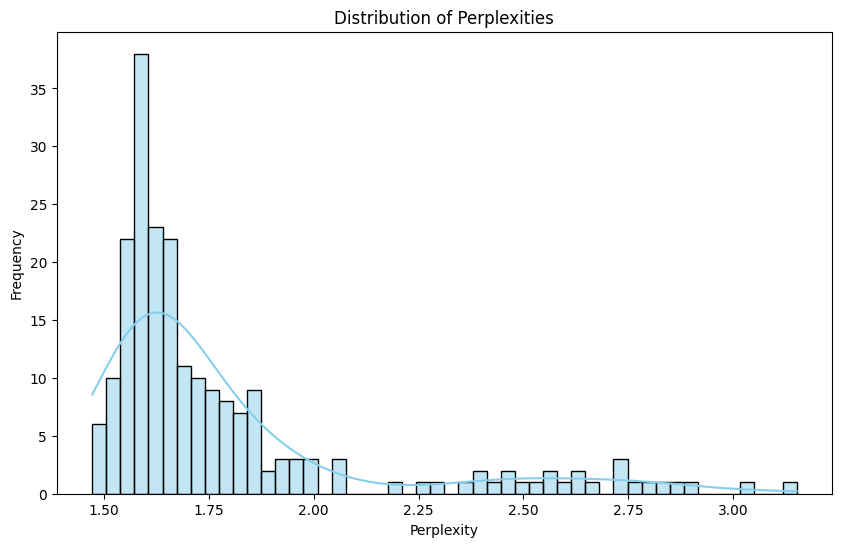

In [42]:
# Create a histogram of perplexities
plt.figure(figsize=(10, 6))
sns.histplot(perplexities, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Perplexities')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.show()

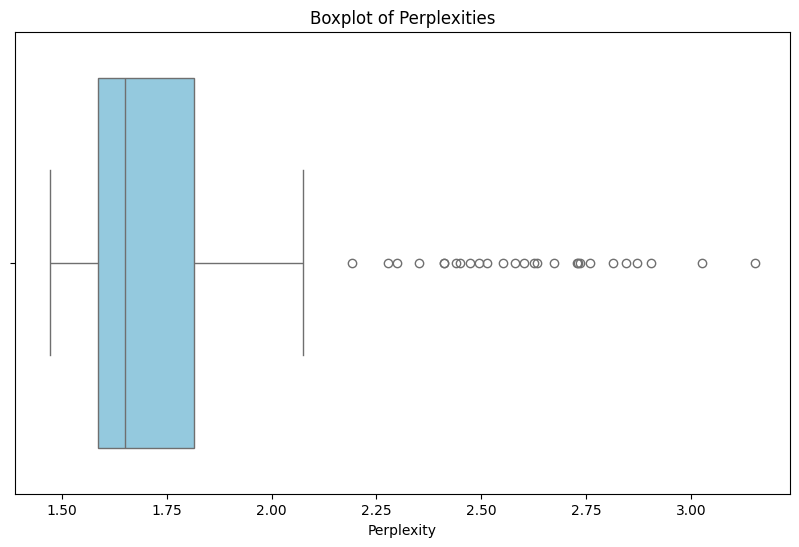

In [43]:
# Create a boxplot of perplexities
plt.figure(figsize=(10, 6))
sns.boxplot(x=perplexities, color='skyblue')
plt.title('Boxplot of Perplexities')
plt.xlabel('Perplexity')
plt.show()

### Evaluate the result using AUC

In [44]:
perplexities = [100000 if np.isinf(perplexity) else perplexity for perplexity in perplexities]

In [57]:
perplexities

[1.509686282193053,
 1.7895430707476732,
 1.7344947312659282,
 1.8353049454090842,
 1.5185034177172057,
 1.5865807355337032,
 1.6130192587706367,
 1.560195104172249,
 1.6269127675356594,
 1.636357087854304,
 100000,
 1.5734084767016783,
 1.7190998927229681,
 1.6859289931293413,
 1.596614859672235,
 1.594372317111611,
 1.5491230599573558,
 2.6002851010416306,
 1.789381112396225,
 1.7475619861708707,
 3.024173743614643,
 1.709048957102226,
 1.524304485635603,
 1.6340896254815584,
 1.7351058428780728,
 1.7078037753503428,
 100000,
 2.3522426411108244,
 2.814203484206724,
 2.410939433518592,
 1.7295791873348298,
 1.5844880398334338,
 2.4480851597856903,
 2.9039902031231826,
 1.574388888699024,
 1.7799757505562424,
 1.6437804282031703,
 1.6324225782535247,
 1.8165783917195282,
 1.699309806882484,
 1.7604918860260985,
 1.6898626775700512,
 100000,
 1.7506936064667427,
 2.7590873446581425,
 1.5468996833436222,
 1.8545956719143182,
 1.7899811854567325,
 1.4726513466922768,
 2.007926977654115,


### Find the Optimal Threshold

In [59]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, perplexities)

# Find the optimal threshold using Youden's Index
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 2.007926977654115


In [69]:
# Set a threshold to classify outliers based on perplexity
threshold = 2 * optimal_threshold
predictions = [1 if perplexity > threshold else 0 for perplexity in perplexities]

# Evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.86      0.86      0.86         7

    accuracy                           0.99       223
   macro avg       0.93      0.93      0.93       223
weighted avg       0.99      0.99      0.99       223



AUC: 0.9775132275132276


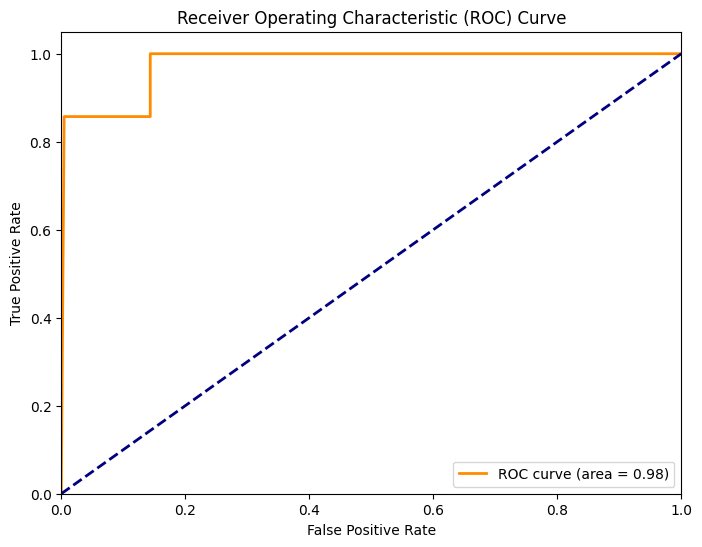

In [70]:
# Calculate AUC
auc_score = roc_auc_score(y_test, perplexities)
print(f'AUC: {auc_score}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, perplexities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()